# Example usage of Statistical Clear Sky Fitting (SCSF)

This notebook shows the basic usage of the SCSF algorithm and code. The source of the data is [NREL's PVDAQ service](https://developer.nrel.gov/docs/solar/pvdaq-v3/). `solardatatools` is a dependency for Statistical Clear Sky, and additional tools are utilized here to prepaire the data for analysis.

### Imports

In [16]:
from statistical_clear_sky import IterativeFitting
from solardatatools import DataHandler, get_pvdaq_data
import matplotlib.pyplot as plt

### Grab a data set from PVDAQ

The `get_pvdaq_data` function is provided by `solardatatools` as an API wrapper for PVDAQ.

In [7]:
df = get_pvdaq_data(sysid=35, api_key='DEMO_KEY', year=[2011, 2012, 2013])

[============================================================] 100.0% ...queries complete in 5.0 seconds       



### Process the data into a clean matrix for analysis

In [8]:
dh = DataHandler(df)
dh.run_pipeline(power_col='ac_power')
dh.report()

total time: 4.33 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              1.70s
Cleaning                   0.09s
Filtering/Summarizing      2.54s
    Data quality           0.11s
    Clear day detect       0.12s
    Clipping detect        1.80s
    Capacity change detect 0.51s

Length:                3.00 years
Capacity estimate:     86.40 kW
Data sampling:         15 minute
Data quality score:    99.1%
Data clearness score:  57.9%
Inverter clipping:     False
Time shifts corrected: None
Time zone correction:  None


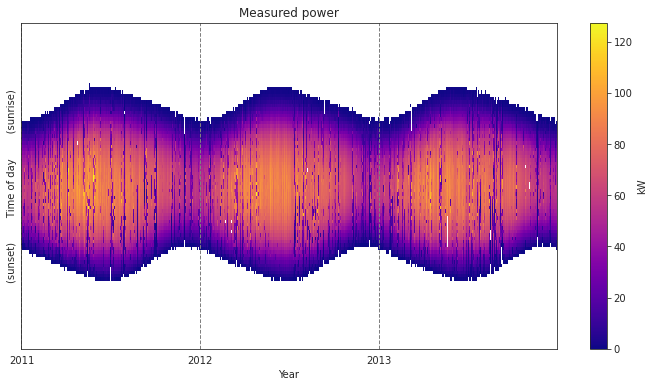

In [9]:
dh.plot_heatmap(matrix='raw');

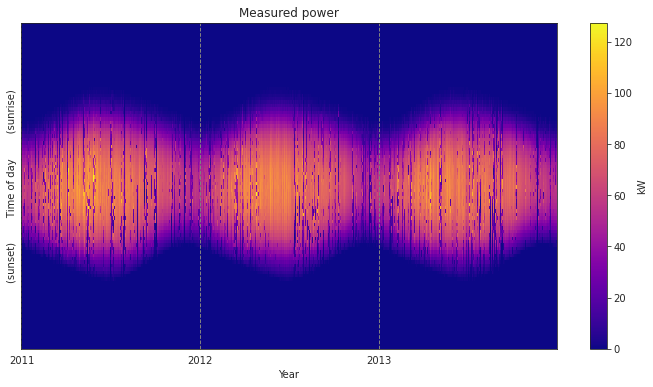

In [10]:
dh.plot_heatmap(matrix='filled');

### Setup and execute the SCSF algorithm using all default values

In [11]:
scsf = IterativeFitting(data_handler_obj=dh)

In [12]:
scsf.execute()

----------------------
SCSF Problem Setup
----------------------
Matrix Size: 96 x 1096 = 105216 power measurements
Sparsity: 71.84%
29630 non-zero measurements under clear conditions
Model size: 96 x 6 + 6 x 1096 = 7152 parameters


----------------------
Algorithm Iterations
----------------------
Starting at Objective: 6.458e+09, f1: 2.446e+07, f2: 5.147e+02, f3: 4.875e+09, f4: 1.559e+09
    Minimizing left matrix


/Users/duncanr/opt/miniconda3/envs/pvi-fresh/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:178: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


    Minimizing right matrix
1 - Objective: 2.303e+07, f1: 2.143e+07, f2: 5.031e+02, f3: 1.599e+06, f4: 2.196e-02
    Minimizing left matrix
    Minimizing right matrix
2 - Objective: 2.006e+07, f1: 1.844e+07, f2: 1.878e+03, f3: 1.616e+06, f4: 8.315e-07
    Minimizing left matrix
    Minimizing right matrix
3 - Objective: 1.982e+07, f1: 1.821e+07, f2: 1.759e+03, f3: 1.601e+06, f4: 6.279e-07
    Minimizing left matrix
    Minimizing right matrix
4 - Objective: 1.973e+07, f1: 1.814e+07, f2: 1.924e+03, f3: 1.596e+06, f4: 2.705e-06
    Minimizing left matrix
    Minimizing right matrix
5 - Objective: 1.970e+07, f1: 1.811e+07, f2: 1.850e+03, f3: 1.596e+06, f4: 8.554e-06
    Minimizing left matrix
    Minimizing right matrix
6 - Objective: 1.969e+07, f1: 1.810e+07, f2: 1.880e+03, f3: 1.594e+06, f4: 1.747e-05
Minimization complete in 0.32 minutes


### Inspect the results of the SCSF procedure

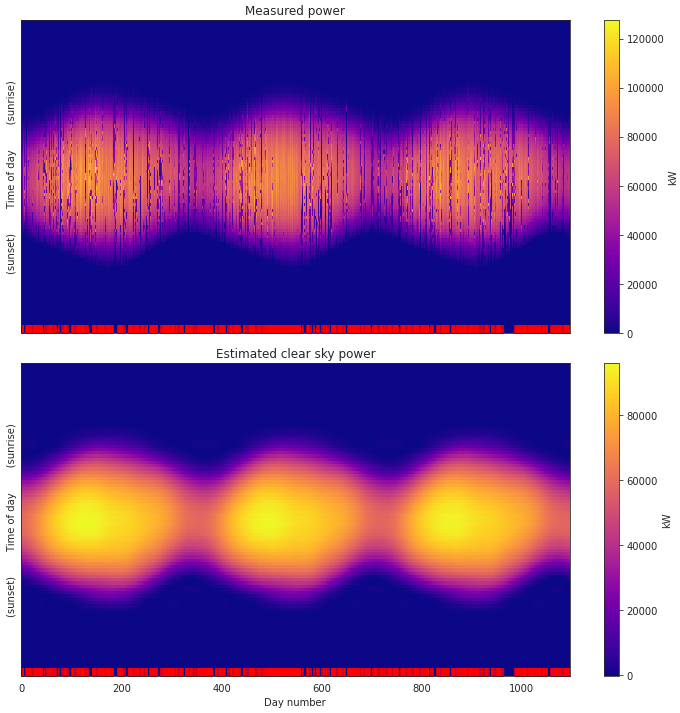

In [14]:
scsf.plot_measured_clear_matrices(show_days=True);

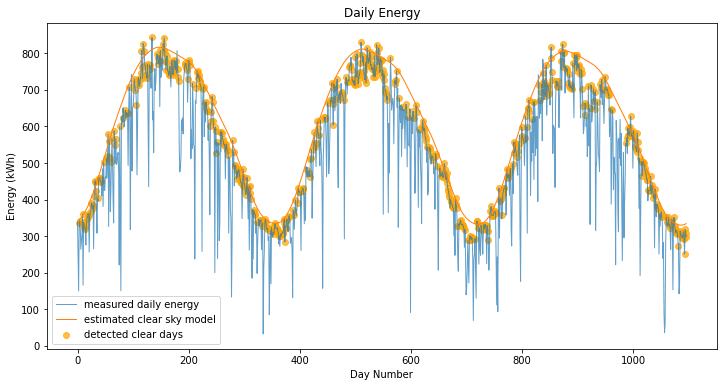

In [17]:
scsf.plot_energy(show_clear=True, show_days=True, scale_power=True)
plt.title('Daily Energy')
plt.xlabel('Day Number')
plt.ylabel('Energy (kWh)');

In [18]:
print('Estimated degradation: {:.2f}% per year'.format(scsf.beta_value.item() * 100))

Estimated degradation: -0.65% per year


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (12).

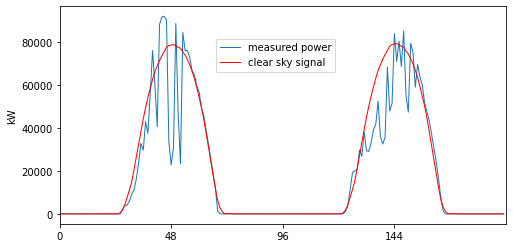

In [20]:
scsf.plot_time_series(start_day=50)